In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import product
#from tqdm import tqdm
from numpy.linalg import matrix_power
from numpy.random import choice

from matplotlib.patches import Rectangle
from matplotlib.cm import ScalarMappable
import pylab as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
    
import mdptoolbox

# Load Scottish Data

In [3]:
df_metocean = pd.read_csv("Scotland_metocean_removed.csv")
df_metocean['Beaufort'] = 0
bf =  np.array([0,0.3,0.6,1.2,2,3,4,5.5,7.5,40]) #0 - 9+ totla 10 scale
for i in range(1,len(bf)):
    df_metocean.Beaufort = np.where(((df_metocean['Hs (m)'] < bf[i]) & (df_metocean['Hs (m)'] > bf[i-1])),i,df_metocean.Beaufort)
df_metocean

Year  Month  Day  Hour    Hs (m)  v10 (m/s)  Beaufort
0      2008      1    1     0  3.446098   6.504866         6
1      2008      1    1     6  3.337338   7.705570         6
2      2008      1    1    12  3.195431   7.402196         6
3      2008      1    1    18  2.971436   6.317548         5
4      2008      1    2     0  3.067249   7.646887         6
...     ...    ...  ...   ...       ...        ...       ...
14595  2017     12   30    18  4.619158  10.236058         7
14596  2017     12   31     0  4.509621   7.472284         7
14597  2017     12   31     6  3.979025   6.199845         6
14598  2017     12   31    12  3.666209  11.561856         6
14599  2017     12   31    18  3.298495   7.788988         6

[14600 rows x 7 columns]

### Plotter

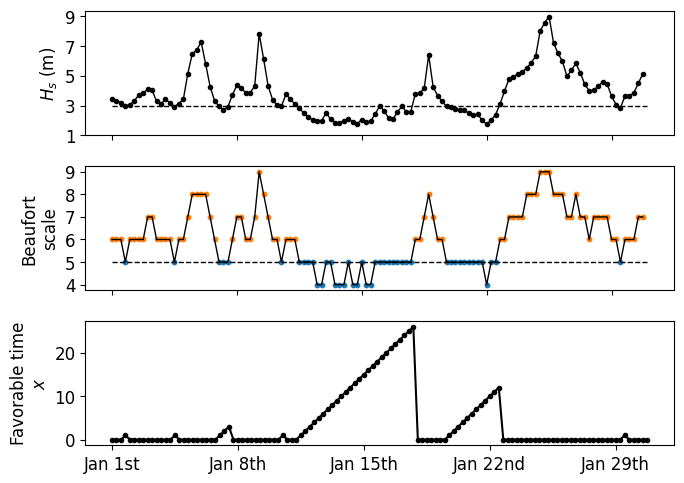

In [6]:
BeaufortSafetyThres = 5
BinaryTimeSeries = df_metocean['Beaufort'] <= BeaufortSafetyThres
BinaryTimeSeries = BinaryTimeSeries.astype(int)
ElapsedTimeSafeWeather = np.zeros_like(BinaryTimeSeries)
if BinaryTimeSeries[0]:
    ElapsedTimeSafeWeather[0] = 1
for i in range(1,BinaryTimeSeries.shape[0]):
    if BinaryTimeSeries[i]:
        ElapsedTimeSafeWeather[i] = ElapsedTimeSafeWeather[i-1] + 1    

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3,1, figsize=[7,5])
ax[0].plot(df_metocean['Hs (m)'][:120],'k',marker='.',lw=1)
ax[0].plot([0,120],[3,3],'k--',lw=1)
ax[0].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ax[0].set_xticklabels([]) #add monthlabels to the xaxis
ax[0].set_yticks([1,3,5,7,9])
ax[0].set_ylabel('$H_{s}$ (m)')

ax[1].plot(df_metocean['Beaufort'][:120],'k',lw=1)
ax[1].scatter(np.where(BinaryTimeSeries[:120])[0],df_metocean['Beaufort'][np.where(BinaryTimeSeries[:120])[0]],color='C0',s=10)
ax[1].scatter(np.where(1-BinaryTimeSeries[:120])[0],df_metocean['Beaufort'][np.where(1-BinaryTimeSeries[:120])[0]],color='C1',s=10)
ax[1].plot([0,120],[BeaufortSafetyThres,BeaufortSafetyThres],'k--',lw=1)
ax[1].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ax[1].set_xticklabels([]) #add monthlabels to the xaxis
ax[1].set_yticks([4,5,6,7,8,9])
ax[1].set_ylabel('Beaufort\nscale')

ax[2].plot(ElapsedTimeSafeWeather[:120],'k',marker='.')
ax[2].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ticklabels = ['Jan 1st','Jan 8th','Jan 15th','Jan 22nd','Jan 29th']
ax[2].set_xticklabels(ticklabels) #add monthlabels to the xaxis
ax[2].set_ylabel('Favorable time\n$x$')
plt.tight_layout()
#plt.savefig('slide_img/preprocessing.jpg',dpi=250)
plt.show()

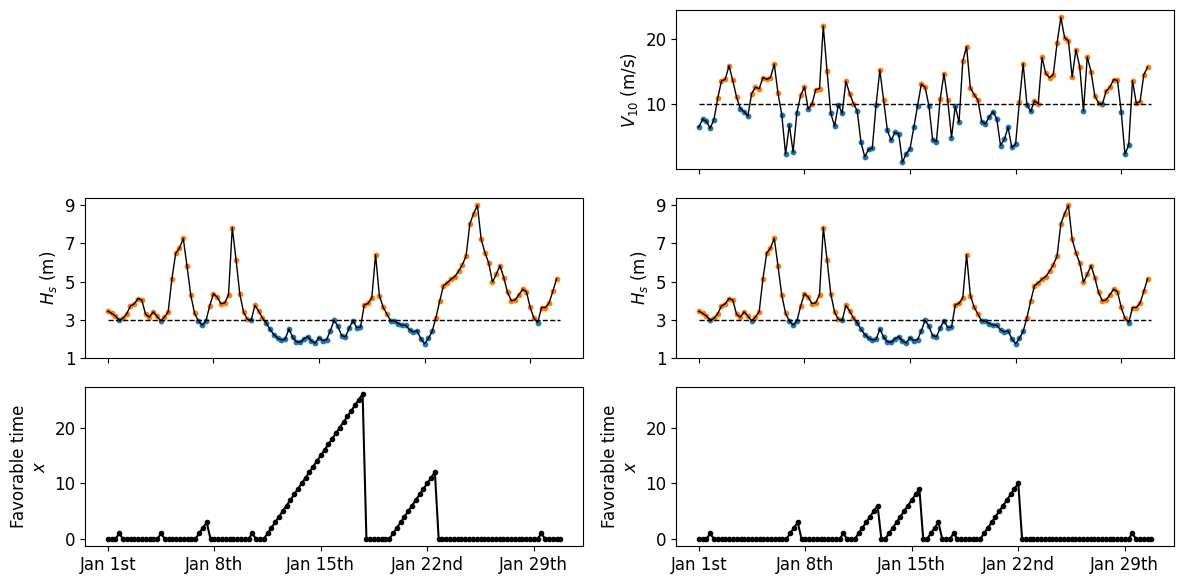

In [7]:
BinaryTimeSeries_hs = df_metocean['Hs (m)'] <= 3
BinaryTimeSeries_hs = BinaryTimeSeries_hs.astype(int)
ElapsedTimeSafeWeather_hs = np.zeros_like(BinaryTimeSeries_hs)
if BinaryTimeSeries_hs[0]:
    ElapsedTimeSafeWeather_hs[0] = 1
for i in range(1,BinaryTimeSeries_hs.shape[0]):
    if BinaryTimeSeries_hs[i]:
        ElapsedTimeSafeWeather_hs[i] = ElapsedTimeSafeWeather_hs[i-1] + 1  
        
BinaryTimeSeries_v = df_metocean['v10 (m/s)'] <= 10
BinaryTimeSeries_v = BinaryTimeSeries_v.astype(int)
ElapsedTimeSafeWeather_v = np.zeros_like(BinaryTimeSeries_v)
if BinaryTimeSeries_v[0]:
    ElapsedTimeSafeWeather_v[0] = 1
for i in range(1,BinaryTimeSeries_v.shape[0]):
    if BinaryTimeSeries_v[i]:
        ElapsedTimeSafeWeather_v[i] = ElapsedTimeSafeWeather_v[i-1] + 1  

BinaryTimeSeries_all = (df_metocean['Hs (m)'] <= 3) & (df_metocean['v10 (m/s)'] <= 10)
BinaryTimeSeries_all = BinaryTimeSeries_all.astype(int)
ElapsedTimeSafeWeather_all = np.zeros_like(BinaryTimeSeries_all)
if BinaryTimeSeries_all[0]:
    ElapsedTimeSafeWeather_all[0] = 1
for i in range(1,BinaryTimeSeries_all.shape[0]):
    if BinaryTimeSeries_all[i]:
        ElapsedTimeSafeWeather_all[i] = ElapsedTimeSafeWeather_all[i-1] + 1  
        
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3,2, figsize=[12,6])

ax[0,0].axis('off')

ax[1,0].plot(df_metocean['Hs (m)'][:120],'k',lw=1)
ax[1,0].scatter(np.where(BinaryTimeSeries_hs[:120])[0],df_metocean['Hs (m)'][np.where(BinaryTimeSeries_hs[:120])[0]],color='C0',s=10)
ax[1,0].scatter(np.where(1-BinaryTimeSeries_hs[:120])[0],df_metocean['Hs (m)'][np.where(1-BinaryTimeSeries_hs[:120])[0]],color='C1',s=10)
ax[1,0].plot([0,120],[3,3],'k--',lw=1)
ax[1,0].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ax[1,0].set_xticklabels([]) #add monthlabels to the xaxis
ax[1,0].set_yticks([1,3,5,7,9])
ax[1,0].set_ylabel('$H_{s}$ (m)')

ax[2,0].plot(ElapsedTimeSafeWeather_hs[:120],'k',marker='.')
ax[2,0].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ticklabels = ['Jan 1st','Jan 8th','Jan 15th','Jan 22nd','Jan 29th']
ax[2,0].set_xticklabels(ticklabels) #add monthlabels to the xaxis
ax[2,0].set_ylabel('Favorable time\n$x$')
ylim= ax[2,0].get_ylim()

ax[0,1].plot(df_metocean['v10 (m/s)'][:120],'k',lw=1)
ax[0,1].scatter(np.where(BinaryTimeSeries_v[:120])[0],df_metocean['v10 (m/s)'][np.where(BinaryTimeSeries_v[:120])[0]],color='C0',s=10)
ax[0,1].scatter(np.where(1-BinaryTimeSeries_v[:120])[0],df_metocean['v10 (m/s)'][np.where(1-BinaryTimeSeries_v[:120])[0]],color='C1',s=10)
ax[0,1].plot([0,120],[10,10],'k--',lw=1)
ax[0,1].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ax[0,1].set_xticklabels([]) #add monthlabels to the xaxis
#ax[0,1].set_yticks([1,3,5,7,9])
ax[0,1].set_ylabel('$V_{10}$ (m/s)')

ax[1,1].plot(df_metocean['Hs (m)'][:120],'k',lw=1)
ax[1,1].scatter(np.where(BinaryTimeSeries_hs[:120])[0],df_metocean['Hs (m)'][np.where(BinaryTimeSeries_hs[:120])[0]],color='C0',s=10)
ax[1,1].scatter(np.where(1-BinaryTimeSeries_hs[:120])[0],df_metocean['Hs (m)'][np.where(1-BinaryTimeSeries_hs[:120])[0]],color='C1',s=10)
ax[1,1].plot([0,120],[3,3],'k--',lw=1)
ax[1,1].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ax[1,1].set_xticklabels([]) #add monthlabels to the xaxis
ax[1,1].set_yticks([1,3,5,7,9])
ax[1,1].set_ylabel('$H_{s}$ (m)')

ax[2,1].plot(ElapsedTimeSafeWeather_all[:120],'k',marker='.')
ax[2,1].set_xticks(np.array([0,4*7,4*7*2,4*7*3,4*7*4]))
ticklabels = ['Jan 1st','Jan 8th','Jan 15th','Jan 22nd','Jan 29th']
ax[2,1].set_xticklabels(ticklabels) #add monthlabels to the xaxis
ax[2,1].set_ylabel('Favorable time\n$x$')
ax[2,1].set_ylim(ylim)
plt.tight_layout()
#plt.savefig('multivariables.jpg',dpi=250)
plt.show()

### Transition Matrix Counting Video Generator

In [6]:
df_metocean = pd.read_csv("Scotland_metocean_removed.csv")
df_metocean = df_metocean.drop(['Hs (m)'], axis=1)
df_metocean['v10_pri'] = df_metocean['v10 (m/s)'].shift(1)
df_metocean['Beaufort'] = 0
bf =  np.array([0.5,1.5,3.3,5.5,7.9,10.7,13.8,17.1,20.7,40]) #0 - 9+ totla 10 scale
for i in range(1,len(bf)):
    df_metocean.Beaufort = np.where(((df_metocean['v10 (m/s)'] < bf[i]) & (df_metocean['v10 (m/s)'] > bf[i-1])),i,df_metocean.Beaufort)
df_metocean['Beaufort_pri'] = 0
df_metocean['Beaufort_pri'] = df_metocean['Beaufort'].shift(1)
df_metocean['timeindex'] = df_metocean.index%1460
df_metocean

Year  Month  Day  Hour  v10 (m/s)    v10_pri  Beaufort  Beaufort_pri  \
0      2008      1    1     0   6.504866        NaN         4           NaN   
1      2008      1    1     6   7.705570   6.504866         4           4.0   
2      2008      1    1    12   7.402196   7.705570         4           4.0   
3      2008      1    1    18   6.317548   7.402196         4           4.0   
4      2008      1    2     0   7.646887   6.317548         4           4.0   
...     ...    ...  ...   ...        ...        ...       ...           ...   
14595  2017     12   30    18  10.236058   9.961706         5           5.0   
14596  2017     12   31     0   7.472284  10.236058         4           5.0   
14597  2017     12   31     6   6.199845   7.472284         4           4.0   
14598  2017     12   31    12  11.561856   6.199845         6           4.0   
14599  2017     12   31    18   7.788988  11.561856         4           6.0   

       timeindex  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
14595       1455  
14596       1456  
14597       1457  
14598       1458  
14599       1459  

[14600 rows x 9 columns]

In [13]:
BeaufortSafetyThres = 5
WorkTime = 1
t_aux = 2
c_down = -1.5
c_fail = -1
cmap='viridis'

In [14]:
#Elapsed time series
BinaryTS = df_metocean['Beaufort'] <= BeaufortSafetyThres
BinaryTS = BinaryTS.astype(int)
ElapsedFavorableTime = np.zeros_like(BinaryTS)
if BinaryTS[0]:
    ElapsedFavorableTime[0] = 1
for i in range(1,BinaryTS.shape[0]):
    if BinaryTS[i]:
        ElapsedFavorableTime[i] = ElapsedFavorableTime[i-1] + 1

#burnin
burnin = np.where(ElapsedFavorableTime == 0)[0][0]
BinaryTS = np.array(BinaryTS[burnin:])
elaps = ElapsedFavorableTime[burnin:]
ub = np.max(elaps)

#Intermediate transition matrix
CmfWTC = np.zeros((ub+1,ub+1), dtype=int)

# Elapsed Time Safe Weather Truncation: 21+ time steps will be considered as 21
#elaps_trnc = ElapsedFavorableTime.copy()
#elaps_trnc[np.where(ElapsedFavorableTime > 21)] = 21

for i in range(WorkTime,len(elaps)):
    CmfWTC[elaps[i-WorkTime],elaps[i]] += 1

TransitionWTC = np.divide(CmfWTC,np.sum(CmfWTC,1)[:,None])

In [11]:
fav_scotland = []
bad_scotland = []
count = 0
for i in range(1,BinaryTS.shape[0]):
    if BinaryTS[i] == 0:
        if ElapsedFavorableTime[i-1] == 0:
            count += 1
        else:
            fav_scotland.append(ElapsedFavorableTime[i-1])
    else:
        if ElapsedFavorableTime[i-1] == 0:
            count += 1
            bad_scotland.append(count)
            count = 0

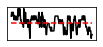

In [7]:
ax = plt.figure(figsize=(1.6,0.6)).add_subplot(111)
ax.plot(df_metocean['Beaufort'].iloc[205:405],'k')
ax.plot([205,405],[5,5],'r--')
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,labelleft=False) 
plt.show()

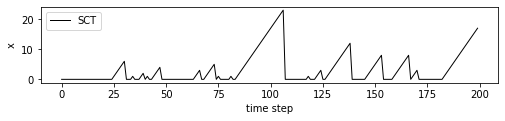

In [8]:
ax = plt.figure(figsize=(8.2,1.4)).add_subplot(111)
ax.plot(elaps[200:400],'k',label='SCT',lw=1)
plt.xlabel('time step')
plt.ylabel('x')
plt.legend()
#plt.savefig('SCT',dpi=600, bbox_inches='tight')
plt.show()

In [16]:
TransitionWTC[np.where(TransitionWTC == 0)] = np.nan

In [17]:
tr_reduced = np.zeros((184,2))
for i in range(182):
    tr_reduced[i,0] = TransitionWTC[i,0]
    tr_reduced[i,1] = TransitionWTC[i,i+1]

In [18]:
tr_reduced

array([[0.71944152, 0.28055848],
       [0.22086466, 0.77913534],
       [0.17490953, 0.82509047],
       [0.15935673, 0.84064327],
       [0.12173913, 0.87826087],
       [0.13663366, 0.86336634],
       [0.11238532, 0.88761468],
       [0.09819121, 0.90180879],
       [0.09455587, 0.90544413],
       [0.10443038, 0.89556962],
       [0.07773852, 0.92226148],
       [0.08812261, 0.91187739],
       [0.04621849, 0.95378151],
       [0.0660793 , 0.9339207 ],
       [0.06132075, 0.93867925],
       [0.05025126, 0.94974874],
       [0.05291005, 0.94708995],
       [0.04469274, 0.95530726],
       [0.08187135, 0.91812865],
       [0.04458599, 0.95541401],
       [0.04666667, 0.95333333],
       [       nan, 1.        ],
       [0.05594406, 0.94405594],
       [0.04444444, 0.95555556],
       [0.03100775, 0.96899225],
       [0.016     , 0.984     ],
       [0.04065041, 0.95934959],
       [0.08474576, 0.91525424],
       [0.02777778, 0.97222222],
       [0.06666667, 0.93333333],
       [0.

# Synthetic TS

In [72]:
def generate(tr,n):
    elaps = [0] #wlog
    fav = []
    bad = []
    count = 0
    for i in range(n):
        
        act = np.random.choice(2,1,p=tr[elaps[i],:])

        if act == 0:
            elaps.append(0)
            if elaps[i] == 0:
                count += 1
            else:
                fav.append(elaps[i])
        else:
            elaps.append(elaps[i]+1)
            if elaps[i] == 0:
                count += 1
                bad.append(count)
                count = 0
    return elaps, fav, bad

# Theoretical Distribution

In [11]:
def tr2lambda(tr,n,cmax):
    P_Enkx = np.zeros((np.int((n+1)/2)+1,cmax))
    
    for k in tqdm(range(1,cmax+1)):
        #parameters
        l = np.int((n+1)/(k+1))
        omega = list(product(range(l+1),range(cmax+1)))
        omega.remove((0,k))
        dim = len(omega)
        lbd = np.zeros((dim,dim))

        #transition probabilities of lambda
        for row in range(dim):
            x = omega[row][0]
            i = omega[row][1]
            
            if i < k-1 :
                lbd[row,omega.index((x, i+1))] = tr[i,1]
                lbd[row,omega.index((x, 0))] = tr[i,0]
            elif (i == k-1) & (x < l):
                lbd[row,omega.index((x+1, k))] = tr[k-1,1]
                lbd[row,omega.index((x, 0))] = tr[k-1,0]
            elif (i == k) & (i < cmax) & (x > 0) & (x <= l):
                lbd[row,omega.index((x-1, k+1))] = tr[k,1]
                lbd[row,omega.index((x, 0))] = tr[k,0]
            elif (i > k) & (i < cmax):
                lbd[row,omega.index((x, i+1))] = tr[i,1]
                lbd[row,omega.index((x, 0))] = tr[i,0]
            elif i == cmax:
                lbd[row,omega.index((x, 0))] = tr[i,0]

        #distribution of E_n,k
        pi0 = np.zeros(dim)
        pi0[0] = 1
        
        for x in range(l+1):
            Ucx = np.array(omega)[:,0] == x
            P_Enkx[x,k-1] = pi0.dot(matrix_power(lbd,n)).dot(Ucx)
            
    return P_Enkx

In [15]:
tr = np.full((4,2),0.5)
P = tr2lambda(tr,3,3)

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1002.30it/s]


In [16]:
P*8

array([[4., 6., 7.],
       [3., 2., 1.],
       [1., 0., 0.]])

In [41]:
P_HVS = tr2lambda(tr_HVS,1000,9)

100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [3:11:31<00:00, 1276.88s/it]


In [100]:
P_HVS = np.load('P_HVS.npy')

# Highly Variable Seas

In [9]:
tr_HVS = np.full((15,2),0.5)
tr_HVS[-1,:] = [1,0]

In [10]:
tr_HVS

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [1. , 0. ]])

In [50]:
#elaps_HVS, fav_HVS, bad_HVS = generate(tr_HVS,1000000-1)
elaps_HVS, fav_HVS, bad_HVS = generate(tr_HVS,200)

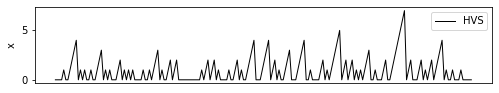

In [53]:
ax = plt.figure(figsize=(8.2,1.4)).add_subplot(111)
ax.plot(elaps_HVS[:200],'k',label='HVS',lw=1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('x')
plt.legend()
plt.savefig('HVS',dpi=600, bbox_inches='tight')
plt.show()

In [111]:
ts_HVS = []
for i in range(200):
    if elaps_HVS[i] > 0 :
        ts_HVS.append(np.random.rand(1)+5)
    else:
        ts_HVS.append(np.random.rand(1)+4)

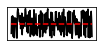

In [112]:
ax = plt.figure(figsize=(1.6,0.6)).add_subplot(111)
ax.plot(ts_HVS,'k')
ax.plot([0,200],[5,5],'r--')
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,labelleft=False) 
plt.show()

In [26]:
data = choice(P_HVS.shape[0],1000,p=P_HVS[:,0]).reshape(-1,1)
for i in range(1,7):
    data = np.append(data,choice(P_HVS.shape[0],1000,p=P_HVS[:,i]).reshape(-1,1),axis=1)
data = np.append(data,np.zeros(1000).reshape(-1,1),axis=1)

In [115]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

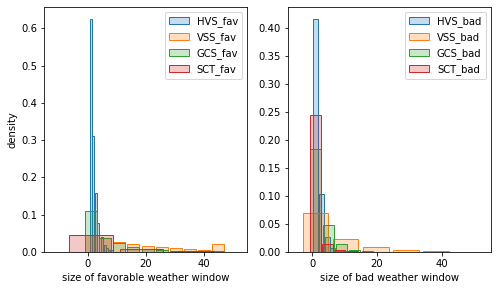

In [249]:
fig, ax = plt.subplots(1, 2, figsize=(8,4.5))
ax[0].hist(fav_HVS, rwidth=0.85, align = 'left',label='HVS_fav',edgecolor='C0',
           fc=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.25),density=True,lw=1)
ax[0].hist(fav_VSS, rwidth=0.85, align = 'left',label='VSS_fav',edgecolor='C1',
           fc=(1.0, 0.4980392156862745, 0.054901960784313725, 0.25),density=True,lw=1)
ax[0].hist(fav_GCS, rwidth=0.85, align = 'left',label='GCS_fav',edgecolor='C2',
           fc=(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 0.25),density=True,lw=1)
ax[0].hist(fav_scotland, rwidth=0.85, align = 'left',label='SCT_fav',edgecolor='C3',
           fc=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 0.25),density=True,lw=1)
ax[0].set_xlabel('size of favorable weather window')
ax[0].set_ylabel('density')
ax[0].set_xlim(right=55)
ax[0].legend()

ax[1].hist(bad_HVS, rwidth=0.85, align = 'left',label='HVS_bad',edgecolor='C0',
           fc=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.25),density=True,lw=1)
ax[1].hist(bad_VSS, rwidth=0.85, align = 'left',label='VSS_bad',edgecolor='C1',
           fc=(1.0, 0.4980392156862745, 0.054901960784313725, 0.25),density=True,lw=1)
ax[1].hist(bad_GCS, rwidth=0.85, align = 'left',label='GCS_bad',edgecolor='C2',
           fc=(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 0.25),density=True,lw=1)
ax[1].hist(bad_scotland, rwidth=0.85, align = 'left',label='SCT_bad',edgecolor='C3',
           fc=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 0.25),density=True,lw=1)
ax[1].set_xlabel('size of bad weather window')
ax[1].set_xlim(right=55)
ax[1].legend()
#plt.savefig('density',dpi=600, bbox_inches='tight')
plt.show()

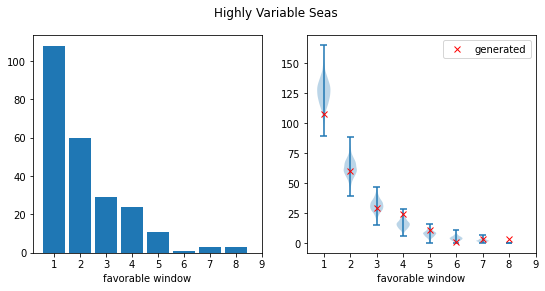

mean: 2.1757322175732217
std: 1.5342931356818756


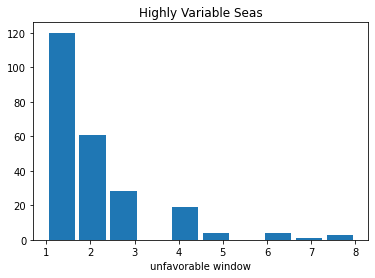

mean: 1.9875
std: 1.379858839398678


In [104]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Highly Variable Seas')
n, bins, patches = ax[0].hist(fav_HVS,bins=range(1,10), rwidth=0.85, align = 'left')
ax[0].set_xlabel('favorable window')
ax[0].set_xticks(range(1,10))

ax[1].violinplot(data)
ax[1].plot(range(1,9),n,'rx',label='generated')
ax[1].set_xticks(range(1,10))
ax[1].set_xlabel('favorable window')
ax[1].legend()
plt.show()
print('mean:',np.mean(fav_HVS))
print('std:',np.std(fav_HVS))

plt.hist(bad_HVS, rwidth=0.85)
plt.title('Highly Variable Seas')
plt.xlabel('unfavorable window')
plt.show()
print('mean:',np.mean(bad_HVS))
print('std:',np.std(bad_HVS))

# Very Stormy Seasons
# low frequency

In [11]:
tr_VSS = np.zeros([51,2])
tr_VSS[0] = [0.9,0.1]
tr_VSS[-1] = [1,0]
for i in range(1,50):
    tr_VSS[i] = [0.05,0.95]

In [54]:
#elaps_VSS, fav_VSS, bad_VSS = generate(tr_VSS,1000000-1)
elaps_VSS, fav_VSS, bad_VSS = generate(tr_VSS,200)

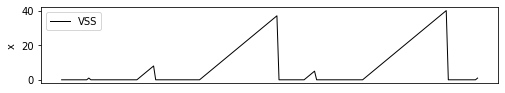

In [57]:
ax = plt.figure(figsize=(8.2,1.4)).add_subplot(111)
ax.plot(elaps_VSS[:200],'k',label='VSS',lw=1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('x')
plt.legend()
plt.savefig('VSS',dpi=600, bbox_inches='tight')
plt.show()

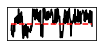

In [118]:
ts_VSS = []
for i in range(200):
    if elaps_VSS[i] > 0 :
        ts_VSS.append(np.random.rand(1)+5)
    else:
        ts_VSS.append(np.random.rand(1)+4)
        
ax = plt.figure(figsize=(1.6,0.6)).add_subplot(111)
ax.plot(ts_VSS,'k')
ax.plot([0,200],[5,5],'r--')
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,labelleft=False) 
plt.show()

#  Generally Calm Seas

In [19]:
tr_GCS = tr_reduced[:51].copy()
tr_GCS[21] = (tr_GCS[20] + tr_GCS[22])/2
tr_GCS[44] = (tr_GCS[43] + tr_GCS[45])/2
tr_GCS[-1] = [1,0]

In [58]:
#elaps_GCS, fav_GCS, bad_GCS = generate(tr_GCS,1000000-1)
elaps_GCS, fav_GCS, bad_GCS = generate(tr_GCS,200)

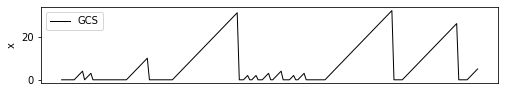

In [61]:
ax = plt.figure(figsize=(8.2,1.4)).add_subplot(111)
ax.plot(elaps_GCS[:200],'k',label='GCS',lw=1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('x')
plt.legend()
plt.savefig('GCS',dpi=600, bbox_inches='tight')
plt.show()

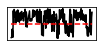

In [130]:
ts_GCS = []
for i in range(200):
    if elaps_GCS[i] > 0 :
        ts_GCS.append(np.random.rand(1)+5)
    else:
        ts_GCS.append(np.random.rand(1)+4)
        
ax = plt.figure(figsize=(1.6,0.6)).add_subplot(111)
ax.plot(ts_GCS,'k')
ax.plot([0,200],[5,5],'r--')
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,labelleft=False) 
plt.show()

# MDP solver

In [20]:
def MDPsolver(elaps, wmax, dmax, n = 4, t_aux = 0, c_down = -1.5, c_fail = -1, discount = 0.95):
    #Intermediate transition matrix
    CmfWTC = np.zeros(shape=(wmax+1,wmax+1), dtype=int)
    CmfWTC_n = np.zeros(shape=(wmax+1,wmax+1), dtype=int)
    
    for i in range(1,len(elaps)):
        if (elaps[i-1] <= wmax) & (elaps[i] <= wmax):
            CmfWTC[elaps[i-1],elaps[i]] += 1
        elif (elaps[i-1] == wmax) & (elaps[i] == wmax+1):
            CmfWTC[elaps[i-1],elaps[i-1]] += 1
    for i in range(n,len(elaps)):
        if (elaps[i-n] <= wmax) & (elaps[i] <= wmax):
            CmfWTC_n[elaps[i-n],elaps[i]] += 1
        elif (elaps[i-n] == wmax) & (elaps[i] == wmax+n):
            CmfWTC_n[elaps[i-n],elaps[i-n]] += 1
    
    TrWTC = np.divide(CmfWTC,np.sum(CmfWTC,1)[:,None])
    TrWTC_n = np.divide(CmfWTC_n,np.sum(CmfWTC_n,1)[:,None])
    
    #Downtime range 0 - dmax
    P = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    R = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    
    # Action 0 : Stay
    for i in range(dmax+1):
        if (i+1) <= dmax:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = c_down
        else:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = c_down

    #Action 1 : Go
    for i in range(dmax+1):
        P[1,(wmax+1)*i:(wmax+1)*(i+1),n:(wmax+1)] = TrWTC_n[:,n:(wmax+1)]

        if (i + n) <= dmax:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = n*c_down+c_fail
        else:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = n*c_down+c_fail
    
    mdptoolbox.util.check(P, R)
    
    vi = mdptoolbox.mdp.ValueIteration([P[0],P[1]],[R[0],R[1]],discount)
    vi.run()
    policy = np.array(vi.policy)
    policy = policy.reshape((dmax+1,wmax+1))
    print('Solution')
    print(policy)
    print(vi.iter)
    
    return policy

In [81]:
def MDPsolver_true(tr, wmax, dmax, n = 4, t_aux = 0, c_down = -1.5, c_fail = -1, discount = 0.95):
    #Intermediate transition matrix
    TrWTC = np.zeros(shape=(wmax+1,wmax+1))
    
    for i in range(wmax):
        TrWTC[i,0] = tr[i,0]
        TrWTC[i,i+1] = tr[i,1]
    TrWTC[wmax,0] = tr[wmax,0]
    TrWTC[wmax,wmax] = tr[wmax,1]
    
    TrWTC_n = np.linalg.matrix_power(TrWTC,n)
    
    #Downtime range 0 - dmax
    P = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    R = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    
    # Action 0 : Stay
    for i in range(dmax+1):
        if (i+1) <= dmax:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = c_down
        else:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = c_down

    #Action 1 : Go
    for i in range(dmax+1):
        P[1,(wmax+1)*i:(wmax+1)*(i+1),n:(wmax+1)] = TrWTC_n[:,n:(wmax+1)]

        if (i + n) <= dmax:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = n*c_down+c_fail
        else:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = n*c_down+c_fail
    
    mdptoolbox.util.check(P, R)
    
    vi = mdptoolbox.mdp.ValueIteration([P[0],P[1]],[R[0],R[1]],discount)
    vi.run()
    policy = np.array(vi.policy)
    policy = policy.reshape((dmax+1,wmax+1))
    print('Solution')
    print(policy)
    print(vi.iter)
    
    return policy

In [93]:
len(elaps)

14595

In [84]:
elaps_HVS, fav_HVS, bad_HVS = generate(tr_HVS,1000000-1)
#elaps_VSS, fav_VSS, bad_VSS = generate(tr_VSS,1000000-1)
#elaps_GCS, fac_GCS, bad_GCS = generate(tr_GCS,1000000-1)
np.save('elaps_HVS',elaps_HVS)
#np.save('elaps_VSS',elaps_VSS)
#np.save('elaps_GCS',elaps_GCS)

In [21]:
elaps_HVS = np.load('elaps_HVS.npy')
elaps_VSS = np.load('elaps_VSS.npy')
elaps_GCS = np.load('elaps_GCS.npy')

# n = 3

In [82]:
policy_HVS_true = MDPsolver_true(tr_HVS, 9, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1, discount=1)

Solution
[[0 0 0 0 0 0 0 0 0 0]]
1


In [83]:
policy_HVS = MDPsolver(elaps_HVS, 9, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1, discount=1)

Solution
[[0 0 0 0 0 0 0 0 0 0]]
1


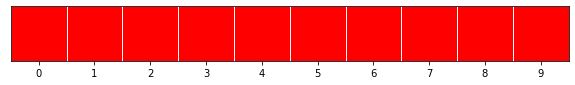

In [149]:
policy = policy_HVS 
filename='HVS_policy1'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,policy.shape[1]])
ax.set_xticks(np.arange(10)+0.5)
ax.set_xticklabels(range(10))
for x in range(policy.shape[1]):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

In [85]:
policy_VSS_true = MDPsolver_true(tr_VSS, 50, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]]
34


In [86]:
policy_VSS = MDPsolver(elaps_VSS, 50, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]]
34


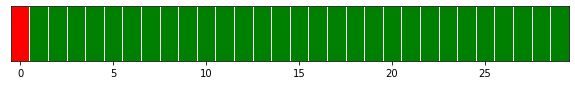

In [151]:
policy = policy_VSS 
filename='VSS_policy1'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,30])
ax.set_xticks(np.arange(0,30,5)+0.5)
ax.set_xticklabels(np.arange(0,30,5))
for x in range(30):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

In [87]:
policy_GCS_true = MDPsolver_true(tr_GCS, 50, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 0 1 0 0 0]]
35


In [88]:
policy_GCS = MDPsolver(elaps_GCS, 50, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 0 1 0 0 0]]
35


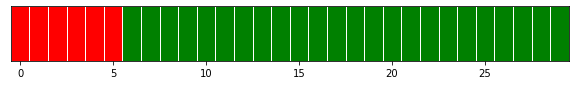

In [153]:
policy = policy_GCS 
filename='GCS_policy1'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,30])
ax.set_xticks(np.arange(0,30,5)+0.5)
ax.set_xticklabels(np.arange(0,30,5))
for x in range(30):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

In [89]:
policy_SCT = MDPsolver(elaps, 50, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 0 1 0 0 1]]
34


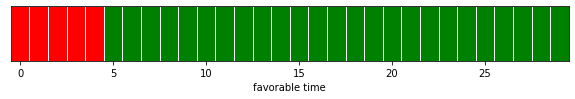

In [155]:
policy = policy_SCT 
filename='SCT_policy1'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,30])
ax.set_xticks(np.arange(0,30,5)+0.5)
ax.set_xticklabels(np.arange(0,30,5))
ax.set_xlabel('favorable time')
for x in range(30):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

# n=1

In [90]:
policy_HVS_true = MDPsolver_true(tr_HVS, 9, 0, n = 1, t_aux = 0, c_down = -2, c_fail = -1, discount=1)

Solution
[[1 1 1 1 1 1 1 1 1 1]]
1


In [91]:
policy_HVS = MDPsolver(elaps_HVS, 9, 0, n = 1, t_aux = 0, c_down = -2, c_fail = -1, discount=1)

Solution
[[1 1 1 1 1 1 1 1 1 1]]
4


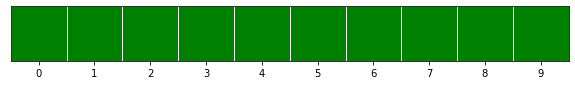

In [92]:
policy = policy_HVS 
filename='HVS_policy2'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,policy.shape[1]])
ax.set_xticks(np.arange(10)+0.5)
ax.set_xticklabels(range(10))
for x in range(policy.shape[1]):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

In [69]:
policy_VSS_true = MDPsolver_true(tr_VSS, 50, 0, n = 1, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
73


In [158]:
policy_VSS = MDPsolver(elaps_VSS, 50, 0, n = 1, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
73


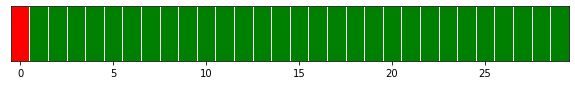

In [159]:
policy = policy_VSS 
filename='VSS_policy2'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,30])
ax.set_xticks(np.arange(0,30,5)+0.5)
ax.set_xticklabels(np.arange(0,30,5))
for x in range(30):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

In [70]:
policy_GCS_true = MDPsolver_true(tr_GCS, 50, 0, n = 1, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
66


In [160]:
policy_GCS = MDPsolver(elaps_GCS, 50, 0, n = 1, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
66


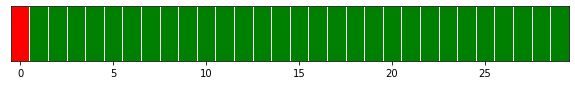

In [161]:
policy = policy_GCS 
filename='GCS_policy2'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,30])
ax.set_xticks(np.arange(0,30,5)+0.5)
ax.set_xticklabels(np.arange(0,30,5))
for x in range(30):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

In [162]:
policy_SCT = MDPsolver(elaps, 50, 0, n = 1, t_aux = 0, c_down = -2, c_fail = -1)

Solution
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
67


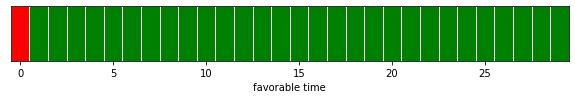

In [163]:
policy = policy_SCT 
filename='SCT_policy2'
fig, ax =plt.subplots(1,figsize=(10,1))
ax.get_yaxis().set_visible(False)
ax.set_xlim([0,30])
ax.set_xticks(np.arange(0,30,5)+0.5)
ax.set_xticklabels(np.arange(0,30,5))
ax.set_xlabel('favorable time')
for x in range(30):
    if policy[0,x] == 0:
        rect = Rectangle((x, 0), 1, 1, facecolor='red', edgecolor='white')
        ax.add_patch(rect)
    else:
        rect = Rectangle((x, 0), 1, 1, facecolor='green', edgecolor='white')
        ax.add_patch(rect)
if filename is not None:
    plt.savefig(filename,dpi=600, bbox_inches='tight')
plt.show()

# exponential

In [24]:
def MDPsolver2(elaps, wmax, dmax, n = 4, t_aux = 0, c_down = -1.5, c_fail = -1):
    #Intermediate transition matrix
    CmfWTC = np.zeros(shape=(wmax+1,wmax+1), dtype=int)
    CmfWTC_n = np.zeros(shape=(wmax+1,wmax+1), dtype=int)
    
    for i in range(1,len(elaps)):
        if (elaps[i-1] <= wmax) & (elaps[i] <= wmax):
            CmfWTC[elaps[i-1],elaps[i]] += 1
        elif (elaps[i-1] == wmax) & (elaps[i] == wmax+1):
            CmfWTC[elaps[i-1],elaps[i-1]] += 1
    for i in range(n,len(elaps)):
        if (elaps[i-n] <= wmax) & (elaps[i] <= wmax):
            CmfWTC_n[elaps[i-n],elaps[i]] += 1
        elif (elaps[i-n] == wmax) & (elaps[i] == wmax+n):
            CmfWTC_n[elaps[i-n],elaps[i-n]] += 1
    
    TrWTC = np.divide(CmfWTC,np.sum(CmfWTC,1)[:,None])
    TrWTC_n = np.divide(CmfWTC_n,np.sum(CmfWTC_n,1)[:,None])
    
    #Downtime range 0 - dmax
    P = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    R = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    
    # Action 0 : Stay
    for i in range(dmax+1):
        if (i+1) <= dmax:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = c_down*np.exp(0.1*i)
        else:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = c_down*np.exp(0.1*dmax)

    #Action 1 : Go
    for i in range(dmax+1):
        P[1,(wmax+1)*i:(wmax+1)*(i+1),n:(wmax+1)] = TrWTC_n[:,n:(wmax+1)]

        if (i + n) <= dmax:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = np.sum(c_down*np.exp(0.1*(i+np.arange(n))))+c_fail
        else:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = np.sum(c_down*np.exp(0.1*(i+np.arange(n))))+c_fail
    
    mdptoolbox.util.check(P, R)
    
    vi = mdptoolbox.mdp.ValueIteration([P[0],P[1]],[R[0],R[1]],1)
    vi.run()
    policy = np.array(vi.policy)
    policy = policy.reshape((dmax+1,wmax+1))
    print('Solution')
    print(policy)
    print(vi.iter)
    
    return policy, TrWTC, TrWTC_n

def plotter2(policy,shape=None,xlabel=False,filename=None):
    from matplotlib.patches import Rectangle
    if shape is None:
        shape = policy.shape
    fig, ax = plt.subplots(1,figsize=(4,4))
    ax.set_ylabel('i (downtime)')
    ax.set_xlabel('x')
    ax.set_xlim([0,shape[1]])
    ax.set_ylim([0,shape[0]])
    if shape[0] > 10:
        ax.set_xticks(np.arange(0,shape[1],5)+0.5)
        ax.set_xticklabels(np.arange(0,shape[1],5))
        ax.set_yticks(np.arange(0,shape[0],5)+0.5)
        ax.set_yticklabels(np.arange(0,shape[0],5))
    else:
        ax.set_xticks(np.arange(0,shape[1])+0.5)
        ax.set_xticklabels(np.arange(0,shape[1]))
        ax.set_yticks(np.arange(0,shape[0])+0.5)
        ax.set_yticklabels(np.arange(0,shape[0]))
    
    for i in range(shape[1]):
        for x in range(shape[0]):
            if policy[i,x] == 0:
                rect = Rectangle((x, i), 1, 1, facecolor='red', edgecolor='white')
                ax.add_patch(rect)
            else:
                rect = Rectangle((x, i), 1, 1, facecolor='green', edgecolor='white')
                ax.add_patch(rect)
    if filename is not None:
        plt.savefig(filename,dpi=600, bbox_inches='tight')
    plt.show()

In [25]:
def MDPsolver2_true(tr, wmax, dmax, n = 4, t_aux = 0, c_down = -1.5, c_fail = -1):
    #Intermediate transition matrix
    TrWTC = np.zeros(shape=(wmax+1,wmax+1))
    
    for i in range(wmax):
        TrWTC[i,0] = tr[i,0]
        TrWTC[i,i+1] = tr[i,1]
    TrWTC[wmax,0] = tr[wmax,0]
    TrWTC[wmax,wmax] = tr[wmax,1]
    
    TrWTC_n = np.linalg.matrix_power(TrWTC,n)
        
    #Downtime range 0 - dmax
    P = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    R = np.zeros((2,(wmax+1)*(dmax+1),(wmax+1)*(dmax+1)))
    
    # Action 0 : Stay
    for i in range(dmax+1):
        if (i+1) <= dmax:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+1):(wmax+1)*(i+2)] = c_down*np.exp(0.1*i)
        else:
            P[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = TrWTC
            R[0,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*(dmax+1)] = c_down*np.exp(0.1*dmax)

    #Action 1 : Go
    for i in range(dmax+1):
        P[1,(wmax+1)*i:(wmax+1)*(i+1),n:(wmax+1)] = TrWTC_n[:,n:(wmax+1)]

        if (i + n) <= dmax:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*(i+n):(wmax+1)*(i+n)+n] = np.sum(c_down*np.exp(0.1*(i+np.arange(n))))+c_fail
        else:
            P[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = TrWTC_n[:,:n]
            R[1,(wmax+1)*i:(wmax+1)*(i+1),(wmax+1)*dmax:(wmax+1)*dmax+n] = np.sum(c_down*np.exp(0.1*(i+np.arange(n))))+c_fail
    
    mdptoolbox.util.check(P, R)
    
    vi = mdptoolbox.mdp.ValueIteration([P[0],P[1]],[R[0],R[1]],1)
    vi.run()
    policy = np.array(vi.policy)
    policy = policy.reshape((dmax+1,wmax+1))
    print('Solution')
    print(policy)
    print(vi.iter)
    
    return policy

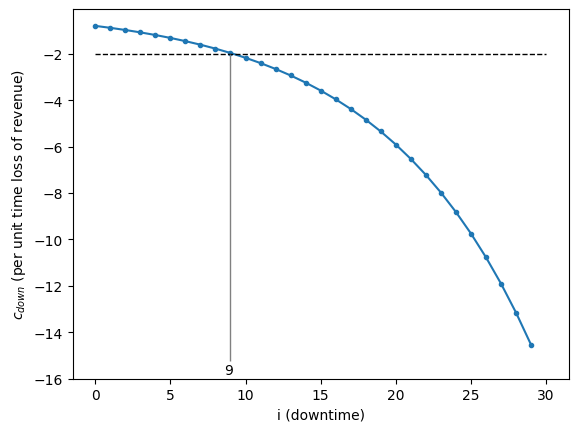

In [13]:
plt.plot(np.arange(30), -0.8*np.exp(0.1*np.arange(30)),'.-')
plt.hlines(-2,0,30,color='k',ls='--',lw=1)
plt.vlines(9,plt.gca().get_ylim()[0],-2,color='gray',lw=1)
plt.annotate('9',(8.6,-15.8))
plt.xlabel('i (downtime)')
plt.ylabel(r'$c_{down}$ (per unit time loss of revenue)')
plt.yticks(np.arange(-16,0,2))
plt.xticks([0,5,10,15,20,25,30])
plt.savefig('exp_c_down.jpg', dpi=250, bbox_inches='tight')
plt.show()

# n=1

In [28]:
policy_HVS2, TrWTC, TrWTC_n = MDPsolver2(elaps_HVS, 9, 9, n = 1, t_aux = 0, c_down = -0.8, c_fail = -1)
policy_HVS2_true = MDPsolver2_true(tr_HVS, 9, 9, n = 1, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
7
Solution
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
7


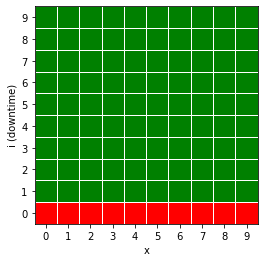

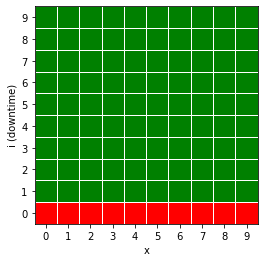

In [29]:
plotter2(policy_HVS2)
plotter2(policy_HVS2_true)

In [188]:
policy_VSS2, _, _ = MDPsolver2(elaps_VSS, 50, 50, n = 1, t_aux = 0, c_down = -0.8, c_fail = -1)
policy_VSS2_true = MDPsolver2_true(tr_VSS, 50, 50, n = 1, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]]
109
Solution
[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]]
108


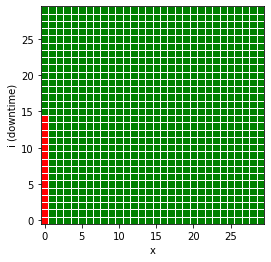

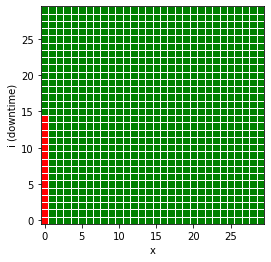

In [198]:
plotter2(policy_VSS2,(30,30))
plotter2(policy_VSS2_true,(30,30))

In [72]:
policy_GCS2, _, _ = MDPsolver2(elaps_GCS, 50, 50, n = 1, t_aux = 0, c_down = -0.8, c_fail = -1)
policy_GCS2_true = MDPsolver2_true(tr_GCS, 50, 50, n = 1, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]]
66
Solution
[[0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]]
65


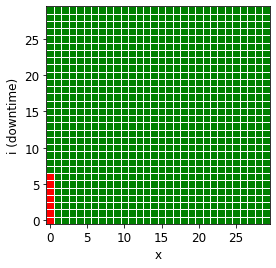

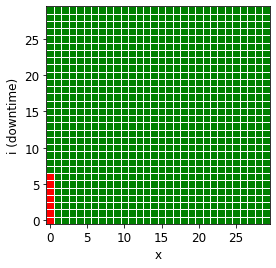

In [73]:
plotter2(policy_GCS2,(30,30))
plotter2(policy_GCS2_true,(30,30))

In [74]:
policy_SCT2,_,_ = MDPsolver2(elaps, 50, 50, n = 1, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
48


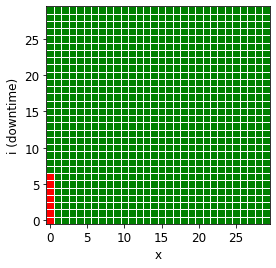

In [75]:
plotter2(policy_SCT2,(30,30))

# n=3

In [32]:
policy_HVS2,_,_ = MDPsolver2(elaps_HVS, 9, 9, n = 3, t_aux = 0, c_down = -0.8, c_fail = -1)
policy_HVS2_true = MDPsolver2_true(tr_HVS, 9, 9, n = 3, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
10
Solution
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
10


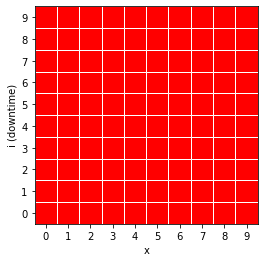

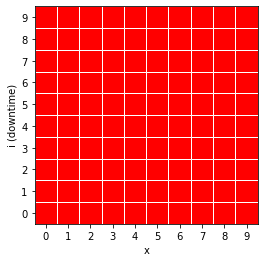

In [33]:
plotter2(policy_HVS2)
plotter2(policy_HVS2_true)

In [34]:
policy_VSS2, _, _ = MDPsolver2(elaps_VSS, 50, 50, n = 3, t_aux = 0, c_down = -0.8, c_fail = -1)
policy_VSS2_true = MDPsolver2_true(tr_VSS, 50, 50, n = 3, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
93
Solution
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
92


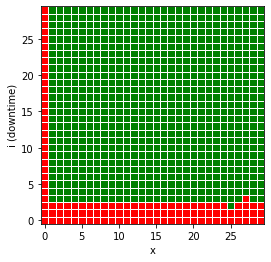

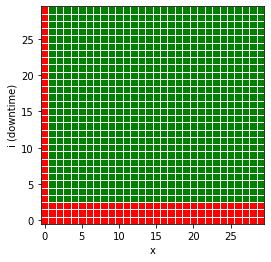

In [35]:
plotter2(policy_VSS2,(30,30))
plotter2(policy_VSS2_true,(30,30))

In [38]:
policy_GCS2, _, _ = MDPsolver2(elaps_GCS, 50, 50, n = 3, t_aux = 0, c_down = -0.8, c_fail = -1)
policy_GCS2_true = MDPsolver2_true(tr_GCS, 50, 50, n = 3, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
69
Solution
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
69


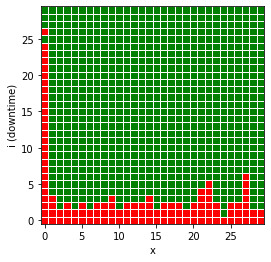

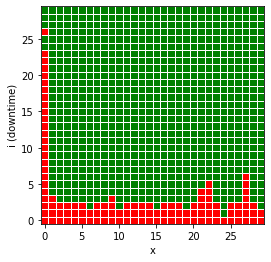

In [39]:
plotter2(policy_GCS2,(30,30))
plotter2(policy_GCS2_true,(30,30))

In [36]:
policy_SCT2, _, _ = MDPsolver2(elaps, 50, 50, n = 3, t_aux = 0, c_down = -0.8, c_fail = -1)

Solution
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [0 1 1 ... 0 0 1]]
61


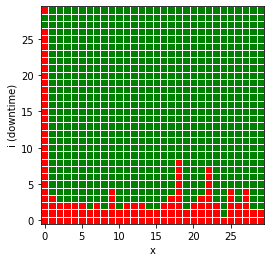

In [37]:
plotter2(policy_SCT2,(30,30))

# Transition Matrix Plotter

In [10]:
def plotter_tr(tr,ylabel=False,colorbar=False,filename=None):
    from matplotlib.patches import Rectangle
    from matplotlib.cm import ScalarMappable
    import pylab as pl
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    fig, ax =plt.subplots(1,figsize=(1,5))
    #ax.get_xaxis().set_visible(False)
    ax.set_xticks([0.5,1.5])
    ax.set_xticklabels(['0','x+1'])
    if tr.shape[0] < 30:
        ax.set_yticks(np.arange(10)+0.5)
        ax.set_yticklabels(range(10))
        ylim = 10
    else:
        ax.set_yticks(np.arange(0,30,2)+0.5)
        ax.set_yticklabels(range(0,30,2))
        ylim = 30
    ax.set_xlim([0,tr.shape[1]])
    ax.set_ylim([0,ylim])
    for x in range(ylim):
        rect = Rectangle((0, x), 1, 1, facecolor=pl.cm.jet(tr[x,0]), edgecolor='white')
        ax.add_patch(rect)
        rect = Rectangle((1, x), 1, 1, facecolor=pl.cm.jet(tr[x,1]), edgecolor='white')
        ax.add_patch(rect)
    plt.gca().invert_yaxis()
    
    if ylabel:
        ax.set_ylabel('x')
    
    if colorbar :
        divider = make_axes_locatable(ax)
        fig.colorbar(ScalarMappable(cmap='jet'),ax=ax,cax = divider.append_axes("right", size="50%", pad=0.05))
        
    if filename is not None:
        plt.savefig(filename, dpi=600, bbox_inches='tight')
        
    plt.show()

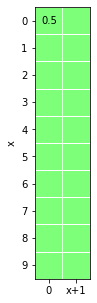

In [93]:
tr = tr_HVS
filename='tr_HVS'
#filename=None
ylim = 10
fig, ax =plt.subplots(1,figsize=(1,5))
ax.annotate('0.5',(0.25,0.6))
ax.set_xticks([0.5,1.5])
ax.set_xticklabels(['0','x+1'])
ax.set_yticks(np.arange(10)+0.5)
ax.set_yticklabels(range(10))
ax.set_xlim([0,tr.shape[1]])
ax.set_ylim([0,ylim])
for x in range(ylim):
    rect = Rectangle((0, x), 1, 1, facecolor=pl.cm.jet(tr[x,0]), edgecolor='white')
    ax.add_patch(rect)
    rect = Rectangle((1, x), 1, 1, facecolor=pl.cm.jet(tr[x,1]), edgecolor='white')
    ax.add_patch(rect)
plt.gca().invert_yaxis()
ax.set_ylabel('x')
if filename is not None:
    plt.savefig(filename, dpi=600, bbox_inches='tight')
plt.show()

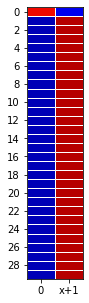

In [4]:
tr = tr_VSS
filename='tr_VSS'
#filename=None
ylim = 30
fig, ax =plt.subplots(1,figsize=(1,5))
#ax.annotate('0.9',(1.25,0.9),fontsize=9,color='white')
#ax.annotate('0.95',(0.2,1.9),fontsize=9,color='white')
ax.set_xticks([0.5,1.5])
ax.set_xticklabels(['0','x+1'])
ax.set_yticks(np.arange(0,30,2)+0.5)
ax.set_yticklabels(range(0,30,2))
ax.set_xlim([0,tr.shape[1]])
ax.set_ylim([0,ylim])
for x in range(ylim):
    rect = Rectangle((0, x), 1, 1, facecolor=pl.cm.jet(tr[x,0]), edgecolor='white')
    ax.add_patch(rect)
    rect = Rectangle((1, x), 1, 1, facecolor=pl.cm.jet(tr[x,1]), edgecolor='white')
    ax.add_patch(rect)
plt.gca().invert_yaxis()
#ax.set_ylabel('x')
if filename is not None:
    plt.savefig(filename, dpi=600, bbox_inches='tight')
plt.show()

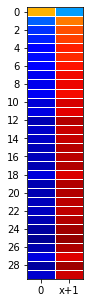

In [41]:
plotter_tr(tr_GCS,filename='tr_GCS')
#plotter_tr(tr_GCS)

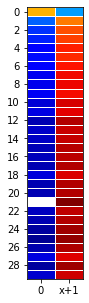

In [42]:
plotter_tr(tr_reduced[:51],filename='tr_SCT')
#plotter_tr(tr_reduced[:51])

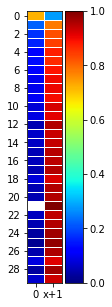

In [43]:
plotter_tr(tr_reduced[:51],colorbar=True,filename='tr_colorbar')
#plotter_tr(tr_reduced[:51],colorbar=True)

In [71]:
tr_reduced[:3]

array([[0.71944152, 0.28055848],
       [0.22086466, 0.77913534],
       [0.17490953, 0.82509047]])

In [15]:
def TPM(elaps, wmax, dmax, n = 4, t_aux = 0, c_down = -1.5, c_fail = -1, discount = 0.95):
    #Intermediate transition matrix
    CmfWTC = np.zeros(shape=(wmax+1,2), dtype=int)
    CmfWTC_n = np.zeros(shape=(wmax+1,2), dtype=int)
    
    for i in range(1,len(elaps)):
        if (elaps[i-1] <= wmax) & (elaps[i] <= wmax):
            if elaps[i] != 0:
                CmfWTC[elaps[i-1],1] += 1
            else:
                CmfWTC[elaps[i-1],0] += 1
    for i in range(n,len(elaps)):
        if (elaps[i-n] <= wmax) & (elaps[i] <= wmax):
            if elaps[i] != 0:
                CmfWTC_n[elaps[i-n],1] += 1
            else:
                CmfWTC_n[elaps[i-n],0] += 1
    
    TrWTC = np.divide(CmfWTC,np.sum(CmfWTC,1)[:,None])
    TrWTC_n = np.divide(CmfWTC_n,np.sum(CmfWTC_n,1)[:,None])
    
    return TrWTC, TrWTC_n

In [16]:
TrWTC, TrWTC_n = TPM(elaps, 50, 0, n = 3, t_aux = 0, c_down = -2, c_fail = -1)

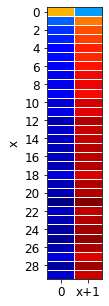

In [17]:
tr = TrWTC
#filename='tr_SCT_1'
filename=None
ylim = 30
fig, ax =plt.subplots(1,figsize=(1,5))
ax.set_xticks([0.5,1.5])
ax.set_xticklabels(['0','x+1'])
ax.set_yticks(np.arange(0,30,2)+0.5)
ax.set_yticklabels(range(0,30,2))
ax.set_xlim([0,tr.shape[1]])
ax.set_ylim([0,ylim])
for x in range(ylim):
    rect = Rectangle((0, x), 1, 1, facecolor=pl.cm.jet(tr[x,0]), edgecolor='white')
    ax.add_patch(rect)
    rect = Rectangle((1, x), 1, 1, facecolor=pl.cm.jet(tr[x,1]), edgecolor='white')
    ax.add_patch(rect)
plt.gca().invert_yaxis()
ax.set_ylabel('x')
if filename is not None:
    plt.savefig(filename, dpi=600, bbox_inches='tight')
plt.show()

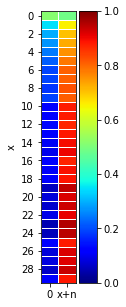

In [30]:
tr = TrWTC_n
filename='tr_SCT_n_cbar'
#filename=None
ylim = 30
fig, ax =plt.subplots(1,figsize=(1,5))
ax.set_xticks([0.5,1.5])
ax.set_xticklabels(['0','x+n'])
ax.set_yticks(np.arange(0,30,2)+0.5)
ax.set_yticklabels(range(0,30,2))
ax.set_xlim([0,tr.shape[1]])
ax.set_ylim([0,ylim])
for x in range(ylim):
    rect = Rectangle((0, x), 1, 1, facecolor=pl.cm.jet(tr[x,0]), edgecolor='white')
    ax.add_patch(rect)
    rect = Rectangle((1, x), 1, 1, facecolor=pl.cm.jet(tr[x,1]), edgecolor='white')
    ax.add_patch(rect)
plt.gca().invert_yaxis()
ax.set_ylabel('x')
divider = make_axes_locatable(ax)
fig.colorbar(ScalarMappable(cmap='jet'),ax=ax,cax = divider.append_axes("right", size="50%", pad=0.05))
if filename is not None:
    plt.savefig(filename, dpi=600, bbox_inches='tight')
plt.show()